In [1]:
from agents import Agent, Runner, SQLiteSession

session = SQLiteSession("user_1", "ai-memory.db")


geaography_agent = Agent(
    name="Geo Expert Agent",
    instructions="You are a expert in geography, you answer questions related to them.",
    handoff_description="Use this to answer geography related questions.",  # desc for main-agent
)
economics_agent = Agent(
    name="Economics Expert Agent",
    instructions="You are a expert in economics, you answer questions related to them.",
    handoff_description="Use this to answer economics questions.",
)

main_agent = Agent(
    name="Main Agent",
    instructions="You are a user facing agent. Transfer to the agent most capable of answering the user's question.",
    handoffs=[
        economics_agent,
        geaography_agent,
    ],
)

In [2]:
# Runner
result = await Runner.run(
    main_agent,
    "What is the second biggest city in Korea",
    # "Why do countries sell bonds?",
    session=session,
)

print(result.last_agent.name)
print(result.final_output)

Geo Expert Agent
The second biggest city in Korea (commonly referring to South Korea) is Busan. Busan is a major port city located on the southeastern coast, and it is the largest city after Seoul. It is famous for its beaches, seafood, harbor, and vibrant metropolis atmosphere.

If you meant Korea as a whole (North and South), Busan is still the largest after Seoul—no city in North Korea surpasses Busan in population or area. In North Korea, the second largest city after Pyongyang is Hamhung, but it is far smaller than Busan.

So, the answer is:
- **South Korea:** Busan
- **North Korea:** Hamhung
- **Entire Korean Peninsula:** Busan


### Graph


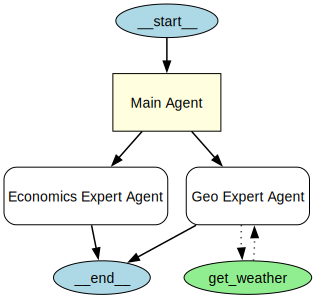

In [ ]:
from agents import function_tool
from agents.extensions.visualization import draw_graph


@function_tool
def get_weather(city: str):
    """Get weather by city"""
    return "30 degrees"


geaography_agent = Agent(
    name="Geo Expert Agent",
    instructions="You are a expert in geography, you answer questions related to them.",
    handoff_description="Use this to answer geography related questions.",  # desc for main-agent
    tools=[get_weather],
)

main_agent = Agent(
    name="Main Agent",
    instructions="You are a user facing agent. Transfer to the agent most capable of answering the user's question.",
    handoffs=[
        economics_agent,
        geaography_agent,
    ],
)

# brew install graphviz
draw_graph(main_agent)

### Output format


In [10]:
from pydantic import BaseModel


class Answer(BaseModel):
    answer: str
    background_explanation: str


geaography_agent = Agent(
    name="Geo Expert Agent",
    instructions="You are a expert in geography, you answer questions related to them.",
    handoff_description="Use this to answer geography related questions.",  # desc for main-agent
    tools=[get_weather],
    output_type=Answer,
)

main_agent = Agent(
    name="Main Agent",
    instructions="You are a user facing agent. Transfer to the agent most capable of answering the user's question.",
    handoffs=[
        economics_agent,
        geaography_agent,
    ],
)

# Runner
result = await Runner.run(
    main_agent,
    "What is the capital of Thailand's northen province",
    session=session,
)

print(result.last_agent.name)
print(result.final_output)

Geo Expert Agent
answer="The capital of Thailand's northern province, Chiang Mai, is the city of Chiang Mai itself. Chiang Mai is the largest and most significant city in northern Thailand." background_explanation='Thailand is divided into provinces, and the northernmost and most significant province in the north is Chiang Mai. The provincial capital is also named Chiang Mai, which is a common practice in Thailand where provincial capitals often share the same name as the province. Chiang Mai city is a major cultural and economic hub in northern Thailand.'
